Loading DataSet

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install preprocessor
import preprocessor as ps
!pip install contractions
!pip install pycontractions
!pip install bert-for-tf2
!pip install sentencepiece
!pip install pdpipe 
!pip install symspellpy
import sys  
!{sys.executable} -m pip install contractions
import unicodedata
!pip install plotly
!pip install cufflinks
!pip install textblob
!pip install pyLDAvis==2.1.2
!pip install scattertext

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Using cached https://files.pythonhosted.org/packages/a6/f5/d3ec9491c530cbc03af32ca2c6b69b0e89660daeb2856b485d90f9d82e5e/pycontractions-2.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/97/45/0fd1d3683d6129f30fa09143fa383cdf6dff8bc0d1648f2cf156109cb772/language-check-1.1.tar.gz
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
    Running setup.py install for language-check ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-l4i9vbh1/language-check/setup.py'"'"'; __file__='"'"'/tmp/pip-install-l4i9vbh1/language-check/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' 

In [ ]:

!pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import json
%matplotlib inline
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python
import re
import gzip
import itertools
import string
import wordcloud
import datetime as dt
import pylab as pl
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gensim
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library
from itertools import chain

In [ ]:
product_data=pd.read_csv('Comp Product Reviews.csv')

In [ ]:
product_data.head()

ID      profileName  ... Rating            Brand
0   RRXDF48XJ3PIZ      SonamGupta   ...    5.0  Amazon Airfryer
1  R1T00CUBTLNHWV     Sumit Saxena  ...    1.0  Amazon Airfryer
2   RYRABT0JRHNX2     Ankit Mishra  ...    5.0  Amazon Airfryer
3  R30JVDIPF5BO91     Tushar Arora  ...    2.0  Amazon Airfryer
4   RBCHCB8D9ZTY3  Amazon Customer  ...    1.0  Amazon Airfryer

[5 rows x 5 columns]

In [ ]:
product_data=product_data.drop(['ID', 'profileName'], axis=1)
product_data

ReviewTitle  Rating            Brand
0            MUST BUY ..... INALASA AIRFRYER     5.0  Amazon Airfryer
1     Low Quality/ Pathetic Customer Support     1.0  Amazon Airfryer
2                                Easy to use     5.0  Amazon Airfryer
3                 Was almost a great product     2.0  Amazon Airfryer
4          Product has manufacturing defect.     1.0  Amazon Airfryer
...                                      ...     ...              ...
3473  Air Fryer with a difference but seller     4.0       Varada Pro
3474                      A happy experience     5.0       Varada Pro
3475                             Recommended     5.0       Varada Pro
3476           Looks trendy black and copper     5.0       Varada Pro
3477                                     NaN     NaN              NaN

[3478 rows x 3 columns]

DATA INFO

In [ ]:
product_data.shape

(3478, 3)

In [ ]:
product_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ReviewTitle  3476 non-null   object 
 1   Rating       3477 non-null   float64
 2   Brand        3477 non-null   object 
dtypes: float64(1), object(2)
memory usage: 81.6+ KB


We can see that we don't have any null values.

# Check for Duplicate entries 

In [ ]:

# Check for Rows containing duplicate data
duplicate_rows_df = product_data[product_data.duplicated()]


In [ ]:
duplicate_rows_df.shape

(420, 3)

## Droping duplicates

In [ ]:
PD_D=product_data.drop_duplicates()

In [ ]:
product_data.count()

ReviewTitle    3476
Rating         3477
Brand          3477
dtype: int64

Checking for Null Values

In [ ]:
# Finding the null values.
print(product_data.isnull().sum())

ReviewTitle    2
Rating         1
Brand          1
dtype: int64


**Droping Null values**

In [ ]:

product_data = product_data.dropna() 
product_data.count()

ReviewTitle    3476
Rating         3476
Brand          3476
dtype: int64

In [ ]:
# After dropping the values check for Null Values
print(product_data.isnull().sum()) 

ReviewTitle    0
Rating         0
Brand          0
dtype: int64


NO of Brands

In [ ]:
print(product_data["Brand"].nunique())
product_data["Brand"].unique()

9


array(['Amazon Airfryer', 'American Micronic', 'Hilton',
       'Insala airfryer', 'Kenster', 'Kent', 'Philips', 'Solara Digital',
       'Varada Pro'], dtype=object)

# **how many Brands of Airfryer have Maximum ratings**

In [ ]:
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].max()].nunique())
print(print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].max()].unique()))
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].max()].count())

9
['Amazon Airfryer' 'American Micronic' 'Hilton' 'Insala airfryer'
 'Kenster' 'Kent' 'Philips' 'Solara Digital' 'Varada Pro']
None
1975


How many brands has Mininum Ratings what are their names

In [ ]:
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].min()].nunique())
print(print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].min()].unique()))
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].min()].count())

7
['Amazon Airfryer' 'American Micronic' 'Hilton' 'Insala airfryer'
 'Kenster' 'Kent' 'Philips']
None
439


# **Which Brand has Maximum and minimum Number of reviews**

In [ ]:
product_data[["Brand", "Rating"]][product_data["ReviewTitle"] == product_data["ReviewTitle"].max()]

Brand  Rating
717  American Micronic     5.0

In [ ]:
#Sorting data according to ProductId in ascending order
product_data=product_data.sort_values("Rating",axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
product_data.head()

ReviewTitle  ...            Brand
1372                            Push button  not worked  ...  Insala airfryer
1636                          air fryer get hot outside  ...             Kent
1911  \n  Repalced it once but to this day doesn't w...  ...          Philips
1015                           Defective piece was sent  ...  Insala airfryer
2921  \n  An excellent Product. A lot of calories ca...  ...          Philips

[5 rows x 3 columns]

In [ ]:
print(product_data['Rating'].value_counts())
print(product_data['Brand'].value_counts())

5.0    1975
4.0     739
1.0     439
3.0     202
2.0     121
Name: Rating, dtype: int64
Philips              1796
Amazon Airfryer       553
Insala airfryer       553
American Micronic     396
Kenster                87
Hilton                 44
Kent                   23
Varada Pro             21
Solara Digital          3
Name: Brand, dtype: int64


Rectangle(xy=(-0.4, 0), width=0.8, height=1975, angle=0)
1975
Rectangle(xy=(0.6, 0), width=0.8, height=739, angle=0)
739
Rectangle(xy=(1.6, 0), width=0.8, height=439, angle=0)
439
Rectangle(xy=(2.6, 0), width=0.8, height=202, angle=0)
202
Rectangle(xy=(3.6, 0), width=0.8, height=121, angle=0)
121


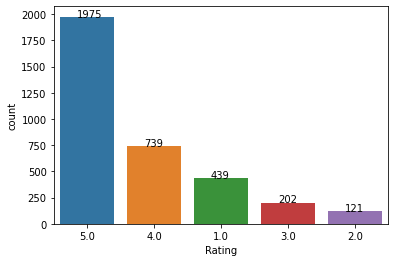

In [ ]:

ax = sns.countplot(x=product_data["Rating"],  data=product_data, order = product_data["Rating"].value_counts().index )
for p, label in zip(ax.patches, product_data["Rating"].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))


Tell me brand that has maximum numbers of reviews and how many ?

In [ ]:
df1=product_data.groupby('Brand').count()

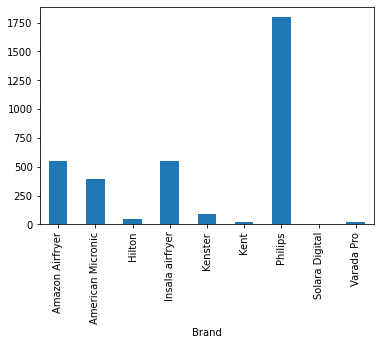

In [ ]:
df1["ReviewTitle"].plot(kind='bar')


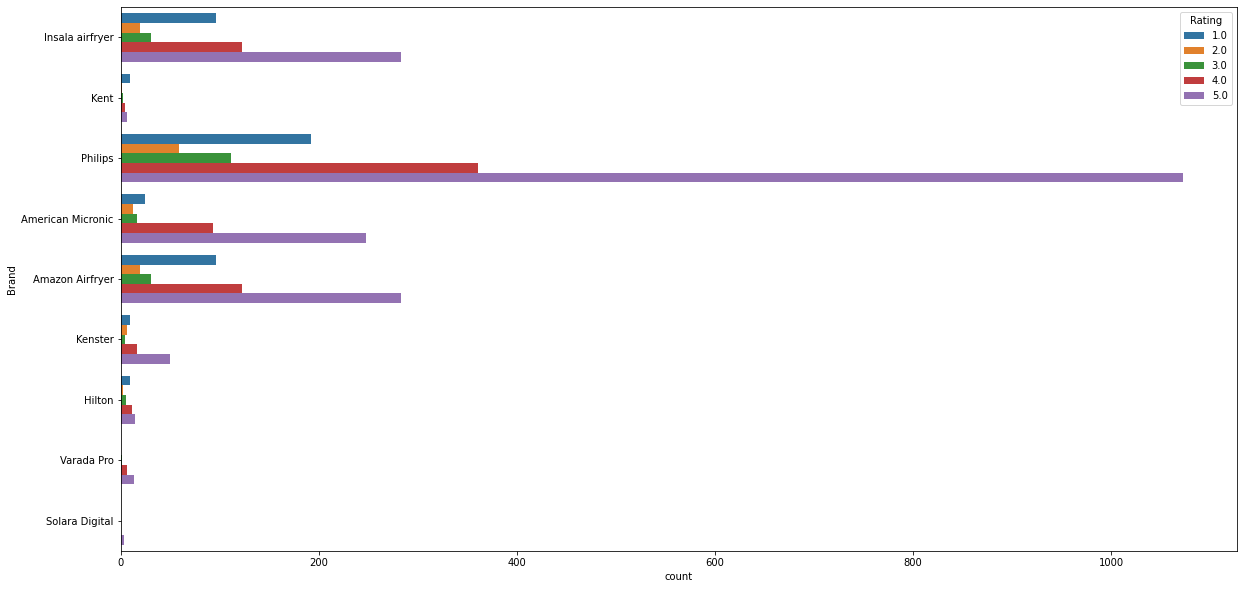

In [ ]:
 plt.figure(figsize=(20,10))
sns.countplot(y="Brand",  hue="Rating", data=product_data)


**Text Cleaning and Text Preprocessing**

*For Text Preprocessing we will use TextBlob Library. In Text Preprocessing we remove stop words, punctuations, convert into lower cases, lemmatize,spell check TextBlob is built upon NLTK and provides an easy to use interface to the NLTK library. various tasks can be performed like part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
*

In [ ]:
Z=''.join(product_data['ReviewTitle'].tolist())
Z

'Push button  not workedair fryer get hot outside\n  Repalced it once but to this day doesn\'t work properly.\nDefective piece was sent\n  An excellent Product. A lot of calories can be saved with its use\nDamaged product receivedWorst experienceWant this replacementService problem\n  Reveived damaged product with full of scratch and the coil also detached from the position\nWorst service. Poor quality product.\n  Product is bud but delivered to me has a little problem.\nTo buy Inalsa airfryer is a waste of money\n  Totally different product delivered without indicator light and display as shown in pic. Very disappointed from this.\n\n  Buy any air frier at lesser cost, it hardly matters, dont pay so much for just a name\nNo guarantee card no invoice no recipe book\n  First Time. I ordered one  but it did not work - the \'tray\' would not go in because it was obstructed by a wire hanging down. I tried to return it to the \'authorised\' agent that was some 25 kms away. At 1230h when I r

**Contractions are those little literary shortcuts we take where instead of “Should have” we prefer “Should’ve” or where “Do not” quickly becomes “Don’t”. We are going to add a new column to our dataframe called “no_contract” and apply a lambda function to the “Reviews” field which will expand any contractions.**

In [ ]:

contractions = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                      "might've": "might have" ,"must've": "must have","o'clock": "of the clock",
                    "she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                    "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have",
                      "would've": "would have" ,"y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:

def cont_to_exp(x):
  if type(x) is str:               ###We cannot apply the contractions when it is with Numerical number
      x=x.replace('\\','')
  for key in contractions:
    values=contractions[key]
    x=x.replace(key,values)
    return
  else:
    return x

In [ ]:

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))
contractions_re


re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|might've|must've|o'clock|she'd|she'd've|she'll|she'll've|should've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|would've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

TEXT **PREPROCESSING**

In [ ]:
# find sentences containing HTML tags
import re
i=0;
for sent in product_data['ReviewTitle'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [ ]:

                                  ####TOKENIZE#####################

for sent in product_data['ReviewTitle'].values:
  def cleandurl(sent): #function to clean the word of any URL
    cleandu = re.compile('r"http\S+"')
    cleanurl= re.sub(cleandu, ' ', sent)
    return cleanurl

for sent in product_data['ReviewTitle'].values:
  def cleanlower(sent): #function to clean and lower the sencentce
     cleandl = re.compile('lower()')
     cleandlr= re.sub(cleandl, ' ', sent)
     return cleandlr
for sent in product_data['ReviewTitle'].values:
  def cleanldigit(sent): #function to clean the word of any digit
     cleand = re.compile('\w*\d\w*')
     cleandigit= re.sub(cleand, ' ', sent)
     return cleandigit


for sent in product_data['ReviewTitle'].values:
  def cleanhtml(sent): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sent)
    return cleantext
for sent in product_data['ReviewTitle'].values:
  def cleanpunc(sent): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))



    


print(stop)
print('************************************')
print(sno.stem('tasty'))

 






    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'itself', 'not', 'she', "she's", 'same', 'does', 'because', 'couldn', 'in', 'which', 'any', 've', 'down', 'of', "didn't", 'him', 'y', 'shan', 'yours', 'are', 'all', 'shouldn', 'was', 'don', 'is', "you're", 'needn', 'wouldn', 'haven', "should've", 'did', 'by', 'these', 'his', 'will', "hasn't", 'its', 'each', 'i', 'both', 'such', 'no', 'it', 'myself', 'just', 'm', 'into', 'an', "it's", 'having', 'if', 'most', 'you', 'but', 'and', 'our', 'themselves', 'as', 'from', 'being', 'himself', "wasn't", 'my', 'or', 'through', "you've", 'am', 'd', "couldn't", 'her', 'be', 'had', 'before', 'herself', 'doing', 'above', 'didn', 'ours', "shouldn't", 'here', 'out', 'very', 'yourselves', 'then', 'theirs', 'who', 'me', 'been', 'on', 'ain', "hadn't", 'mightn', 's', 'should', 'than', 'can', 'for', 'they', 'so', 'again', "weren't", "haven't", 'nor', 'ourselves', 'below', 'were', 'too', 'dur

In [ ]:

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in product_data['ReviewTitle'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    sent=cleandurl(sent) # remove URL
    sent=cleanldigit(sent) # remove digits


    
    for w in sent.split():

        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower()  not in  stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (product_data['Rating'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(product_data['Rating'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

Streaming output truncated to the last 5000 lines.
[b'good']
***********************************************************************
[b'good', b'applianc', b'kitchen', b'especi', b'fond', b'fri', b'food', b'put', b'weight', b'howev', b'tast', b'food', b'cook', b'air', b'fryer', b'good', b'oil', b'fri', b'food', b'becom', b'quit', b'accustom']
***********************************************************************
[b'smart', b'look', b'easi', b'use', b'effect', b'cook']
***********************************************************************
[b'air', b'fryer', b'good', b'work', b'fine', b'consum', b'lot', b'electr', b'power', b'almost', b'equal', b'oven']
***********************************************************************
[b'bought', b'last', b'month', b'use', b'much', b'tri', b'fri', b'chucken', b'fish', b'fri', b'turn', b'crisp', b'good', b'impt', b'stress', b'free']
***********************************************************************
[b'good', b'use', b'product', b'includ', b'c

In [ ]:
 product_data['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
product_data['CleanedText']=product_data['CleanedText'].str.decode("utf-8")

In [ ]:
product_data

index  ... pol_num
0      1372  ...       0
1      1636  ...       1
2      1911  ...       0
3      1015  ...       0
4      2921  ...       1
...     ...  ...     ...
3471   1520  ...       1
3472   1522  ...       1
3473   1524  ...       1
3474   1509  ...       1
3475   3476  ...       1

[3476 rows x 9 columns]

Feature Engineering
**we will be using Textblob for Sentement_polarity of the Reviews and word len and review len**

In [ ]:
from textblob import TextBlob   ####TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. 
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()


In [ ]:
def get_polarity(x):
    return TextBlob(x).sentiment.polarity
product_data['Polarity'] = product_data['ReviewTitle'].apply(get_polarity)
product_data['Sentiment_Type']=''
product_data.loc[product_data.Polarity>0,'Sentiment_Type']='POSITIVE'
product_data.loc[product_data.Polarity==0,'Sentiment_Type']='NEUTRAL'
product_data.loc[product_data.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [ ]:
product_data.reset_index(drop=True)

index  ... pol_num
0      1372  ...       0
1      1636  ...       1
2      1911  ...       0
3      1015  ...       0
4      2921  ...       1
...     ...  ...     ...
3471   1520  ...       1
3472   1522  ...       1
3473   1524  ...       1
3474   1509  ...       1
3475   3476  ...       1

[3476 rows x 9 columns]

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

**Distribution of Sentiment polarity**

In [ ]:
configure_plotly_browser_state()
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
pyo.init_notebook_mode()
init_notebook_mode(connected=True) 
product_data['Polarity'].iplot(kind='hist',colors='red',bins=50,xTitle='Polarity',yTitle='count',title='Sentiment Polarity distribution')

######### we will be ploting polarity count on reviews


In [ ]:
####### we will be ploting count of sentiment_type 
configure_plotly_browser_state()
product_data.Sentiment_Type.value_counts().iplot(kind='bar',title="Sentiment Analysis")

In [ ]:
###### we will be plotting rating count

configure_plotly_browser_state()
product_data['Rating'].iplot(kind='hist',colors='red',bins=50,xTitle='Rating',yTitle='count',title='Review Rating distribution')


In [ ]:
product_data['Brand'].value_counts()

Philips              1796
Amazon Airfryer       553
Insala airfryer       553
American Micronic     396
Kenster                87
Hilton                 44
Kent                   23
Varada Pro             21
Solara Digital          3
Name: Brand, dtype: int64

In [ ]:
product_data.groupby('Brand').count()

index  ReviewTitle  ...  Review_emotions  pol_num
Brand                                  ...                          
Amazon Airfryer      553          553  ...              553      553
American Micronic    396          396  ...              396      396
Hilton                44           44  ...               44       44
Insala airfryer      553          553  ...              553      553
Kenster               87           87  ...               87       87
Kent                  23           23  ...               23       23
Philips             1796         1796  ...             1796     1796
Solara Digital         3            3  ...                3        3
Varada Pro            21           21  ...               21       21

[9 rows x 8 columns]

In [ ]:
###COUNT PLOT ON BRANDS
configure_plotly_browser_state()
product_data['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF BRANDS')

In [ ]:
!pip install text2emotion
import text2emotion as te

In [ ]:
def get_emotion(x):
         return te.get_emotion(x)




In [ ]:
product_data.loc[product_data.Polarity>=0,'Review_emotions']='HAPPY'
product_data.loc[product_data.Polarity<0,'Review_emotions']='ANGRY'
product_data.loc[product_data.Polarity==0,'Review_emotions']='SATISFIED'

In [ ]:
product_data.loc[product_data.Polarity>=0,'pol_num']='1'
product_data.loc[product_data.Polarity<0,'pol_num']='-1'
product_data.loc[product_data.Polarity==0,'pol_num']='0'

In [ ]:
product_data.head(50)

index  ... pol_num
0    1372  ...       0
1    1636  ...       1
2    1911  ...       0
3    1015  ...       0
4    2921  ...       1
5     586  ...       0
6    1017  ...      -1
7    1634  ...       0
8     313  ...       0
9    2919  ...       1
10   1020  ...      -1
11   2918  ...      -1
12    321  ...      -1
13   1929  ...      -1
14   2806  ...      -1
15    304  ...       0
16   2950  ...      -1
17   2951  ...       1
18   2606  ...       0
19    300  ...       0
20   1027  ...       0
21   1204  ...       0
22   1942  ...       1
23   2915  ...       1
24   1616  ...       0
25    589  ...      -1
26   1910  ...      -1
27   1210  ...      -1
28   2923  ...       1
29    351  ...       0
30   1650  ...       0
31   1645  ...      -1
32   1006  ...       1
33    346  ...       0
34   1882  ...       0
35   1885  ...      -1
36   1643  ...       0
37    341  ...       0
38   1008  ...      -1
39   1890  ...       0
40   2832  ...      -1
41   1893  ...       0
42   1642  ...      -1
43   1895  ...      -1
44    334  ...       0
45   1897  ...      -1
46   1641  ...       0
47   2807  ...      -1
48    330  ...      -1
49   1638  ...       0

[50 rows x 9 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

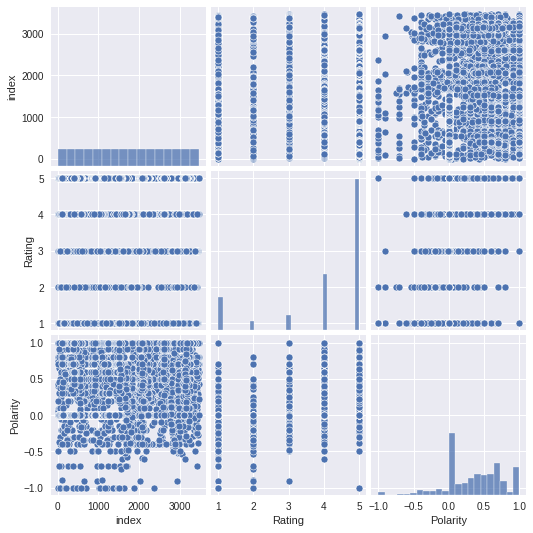

In [ ]:
sns.pairplot(product_data)

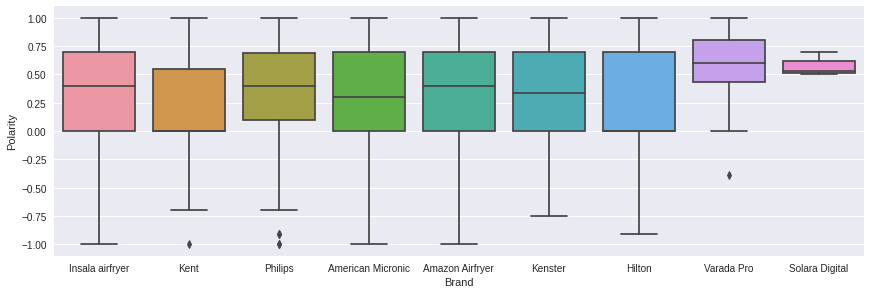

In [ ]:
sns.catplot(x='Brand',y='Polarity',data=product_data,kind='box',height=4, aspect=3)

In [ ]:
import plotly. express as px
import plotly.graph_objects as go

# **Based on Rating and Polarity  Recomending Brands **

---



In [ ]:
x1=product_data[product_data['Rating']>=3.0]['Brand']
x2=product_data[product_data['Rating']<=2.0]['Brand']


In [ ]:

trace1=go.Histogram(x=x1,name='Recomended',opacity=0.8)
trace2=go.Histogram(x=x2,name='Not Recomended',opacity=0.8)



In [ ]:
configure_plotly_browser_state()
data=[trace1,trace2]
layout=go.Layout(barmode='overlay',title='Distribution of Recomending Brands based on Ratings')
fig=go.Figure(data=data,layout=layout)
fig.show()


In [ ]:
y1=product_data[product_data['Polarity']>=0]['Brand']
y2=product_data[product_data['Polarity']<0]['Brand']
trace_1=go.Histogram(x=y1,name='Recomended',opacity=0.8)
trace_2=go.Histogram(x=y2,name='Not Recomended',opacity=0.8)


In [ ]:

s=pd.concat([y1, y2])
s

0       Insala airfryer
1                  Kent
2               Philips
3       Insala airfryer
4               Philips
             ...       
3165            Philips
3245    Insala airfryer
3342            Kenster
3350            Kenster
3397            Philips
Name: Brand, Length: 3476, dtype: object

In [ ]:
configure_plotly_browser_state()
data=[trace_1,trace_2]
layout=go.Layout(barmode='overlay',title='Distribution of polarity of reviews based on ratings')
fig=go.Figure(data=data,layout=layout)
fig.show()


In [ ]:

!pip install autoviz

In [ ]:

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set: (3478, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables


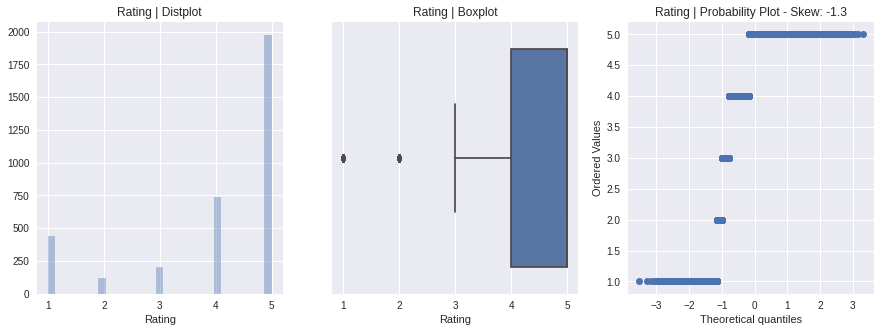

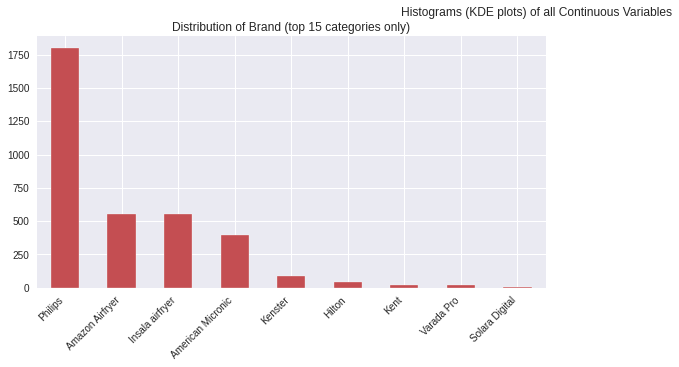

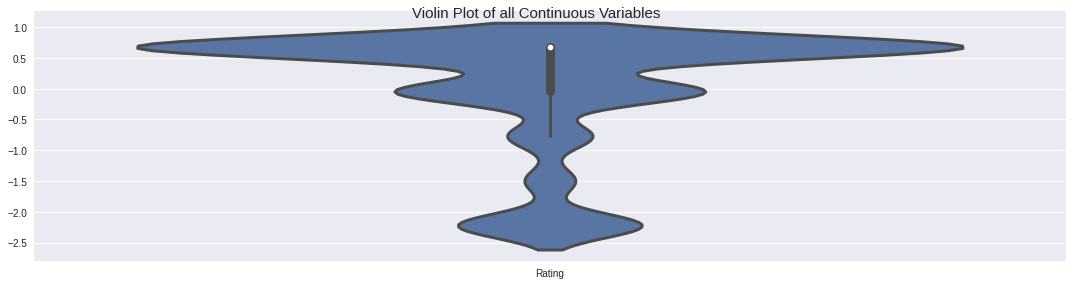

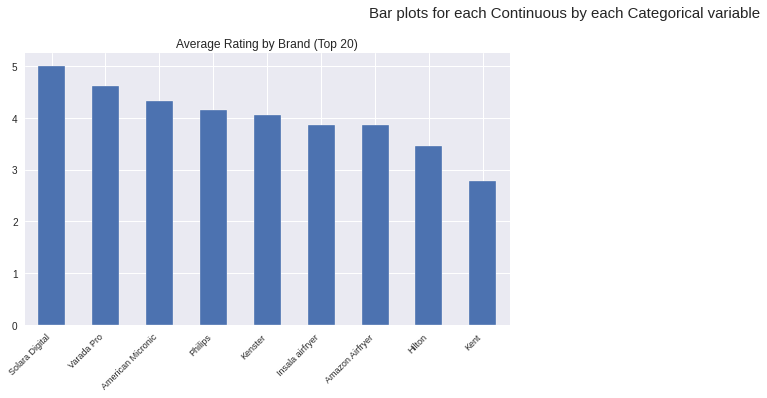

Time to run AutoViz (in seconds) = 2.045

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = "Comp Product Reviews.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [ ]:
# highest positive sentiment reviews 
only_pos=product_data[product_data["Polarity"] >0].sort_values("Sentiment_Type", ascending = False)[[ "CleanedText","Sentiment_Type","Brand","Polarity"]]

# highest Nutral sentiment reviews
only_Nutral=product_data[product_data["Polarity"] ==0].sort_values("Sentiment_Type", ascending = False)[["CleanedText", "Sentiment_Type","Brand","Polarity"]]

# highest Negative sentiment reviews 
only_Neg=product_data[product_data["Polarity"] <0].sort_values("Sentiment_Type", ascending = False)[["CleanedText", "Sentiment_Type","Brand","Polarity"]]


In [ ]:
only_pos

CleanedText  ...  Polarity
1                              air fryer get hot outsid  ...  0.125000
2447                           great product amaz price  ...  0.700000
2452                          good product reason price  ...  0.450000
2453                                      excel product  ...  1.000000
2455                                          easi oper  ...  0.433333
...                                                 ...  ...       ...
1523  airfryer liter save heart attack fast econom u...  ...  0.457031
1524  less amount oil thought food would tast good w...  ...  0.411111
1525                 good product satisfi amazon servic  ...  0.675000
1526  wonder buy much fri food want without actual f...  ...  0.100000
3475                           look trendi black copper  ...  0.216667

[2391 rows x 4 columns]

In [ ]:
import gensim
from gensim import corpora

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma_Pos = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma_Pos.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

only_pos['lemma_Pos']=only_pos['CleanedText'].apply(clean)
only_pos['lemma_Pos']

1                          [air, fryer, get, hot, outsid]
2447                        [great, product, amaz, price]
2452                       [good, product, reason, price]
2453                                     [excel, product]
2455                                         [easi, oper]
                              ...                        
1523    [airfryer, liter, save, heart, attack, fast, e...
1524    [le, amount, oil, thought, food, would, tast, ...
1525             [good, product, satisfi, amazon, servic]
1526    [wonder, buy, much, fri, food, want, without, ...
3475                        [look, trendi, black, copper]
Name: lemma_Pos, Length: 2391, dtype: object

In [ ]:
#create dictionary
dictionary_pos = corpora.Dictionary(only_pos['lemma_Pos'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary_pos.num_nnz)
print("*********************************************************************************************************")
#create document term matrix
doc_term_matrix_p = [dictionary_pos.doc2bow(doc) for doc in only_pos['lemma_Pos'] ]
print(len(doc_term_matrix_p))
print("*********************************************************************************************************")
lda = gensim.models.ldamodel.LdaModel
num_topics=3
%time ldamodel_pos = lda(doc_term_matrix_p,num_topics=num_topics,id2word=dictionary_pos,passes=50,minimum_probability=0)
ldamodel_pos.print_topics(num_topics=num_topics)

17877
*********************************************************************************************************
2391
*********************************************************************************************************
CPU times: user 29.5 s, sys: 417 ms, total: 29.9 s
Wall time: 29.6 s


[(0,
  '0.025*"fri" + 0.022*"oil" + 0.019*"food" + 0.017*"use" + 0.014*"cook" + 0.011*"item" + 0.011*"buy" + 0.011*"love" + 0.010*"worth" + 0.009*"healthi"'),
 (1,
  '0.169*"product" + 0.131*"good" + 0.034*"use" + 0.033*"great" + 0.032*"excel" + 0.031*"nice" + 0.026*"easi" + 0.015*"price" + 0.014*"buy" + 0.013*"amazon"'),
 (2,
  '0.032*"fri" + 0.028*"oil" + 0.024*"use" + 0.023*"cook" + 0.020*"fryer" + 0.017*"air" + 0.013*"food" + 0.010*"healthi" + 0.010*"snack" + 0.009*"great"')]

In [ ]:
lda_display_pos = pyLDAvis.gensim.prepare(ldamodel_pos, doc_term_matrix_p, dictionary_pos, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_pos)

In [ ]:
# Assigns the topics to the documents in corpus
lda_corpus_p = ldamodel_pos[doc_term_matrix_p]
[doc for doc in lda_corpus_p]

[[(0, 0.64050144), (1, 0.05596173), (2, 0.30353683)],
 [(0, 0.066683255), (1, 0.8654236), (2, 0.06789311)],
 [(0, 0.0778681), (1, 0.8552235), (2, 0.066908486)],
 [(0, 0.111378245), (1, 0.7774077), (2, 0.11121405)],
 [(0, 0.11328713), (1, 0.76580405), (2, 0.120908804)],
 [(0, 0.11137783), (1, 0.7774081), (2, 0.11121402)],
 [(0, 0.16667436), (1, 0.6585894), (2, 0.1747362)],
 [(0, 0.06721413), (1, 0.8660859), (2, 0.06669996)],
 [(0, 0.11844707), (1, 0.76854473), (2, 0.11300818)],
 [(0, 0.18411092), (1, 0.6193257), (2, 0.19656341)],
 [(0, 0.16667436), (1, 0.65848064), (2, 0.174845)],
 [(0, 0.16738924), (1, 0.6659389), (2, 0.16667183)],
 [(0, 0.16671188), (1, 0.66285944), (2, 0.1704287)],
 [(0, 0.0679185), (1, 0.86311543), (2, 0.06896607)],
 [(0, 0.46239343), (1, 0.42506993), (2, 0.11253664)],
 [(0, 0.1493168), (1, 0.45511267), (2, 0.39557055)],
 [(0, 0.090439305), (1, 0.81886435), (2, 0.09069634)],
 [(0, 0.0703918), (1, 0.8610924), (2, 0.06851582)],
 [(0, 0.111378334), (1, 0.7774076), (2, 

In [ ]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus_p]]))

threshold = sum(scores)/len(scores)
print(threshold)
cluster1_p = [j for i,j in zip(lda_corpus_p,only_pos.index) if i[0][1] > threshold]
cluster2_p = [j for i,j in zip(lda_corpus_p,only_pos.index) if i[1][1] > threshold]
cluster3_p = [j for i,j in zip(lda_corpus_p,only_pos.index) if i[2][1] > threshold]

print(len(cluster1_p))
print(len(cluster2_p))
print(len(cluster3_p))

0.3333333344936077
521
1543
755


**Negative**

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma_neg = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma_neg.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

only_Neg['lemma_neg']=only_Neg['CleanedText'].apply(clean)
only_Neg['lemma_neg']

6                                         [worst, experi]
517     [total, wast, moneytak, lot, time, cooktoo, mu...
603                                             [satisfi]
592                                        [expect, upto]
587                              [take, long, time, cook]
                              ...                        
270                                        [bad, product]
263                       [poor, product, servic, amazon]
261     [found, broken, bodi, need, focus, product, qu...
260                  [buy, inalsa, airfryer, wast, money]
3397    [roast, food, even, frozen, snack, come, well,...
Name: lemma_neg, Length: 357, dtype: object

In [ ]:
#create dictionary
Neg_dictionary = corpora.Dictionary(only_Neg['lemma_neg'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(Neg_dictionary.num_nnz)
print("*********************************************************************************************************")
#create document term matrix
doc_term_matrix_N = [Neg_dictionary.doc2bow(doc) for doc in only_Neg['lemma_neg'] ]
print(len(doc_term_matrix_N))
print("*********************************************************************************************************")
lda_neg = gensim.models.ldamodel.LdaModel
num_topics=3
%time ldamodel_Neg = lda_neg(doc_term_matrix_N,num_topics=num_topics,id2word=Neg_dictionary,passes=50,minimum_probability=0)
ldamodel_Neg.print_topics(num_topics=num_topics)

2848
*********************************************************************************************************
357
*********************************************************************************************************
CPU times: user 8.8 s, sys: 142 ms, total: 8.95 s
Wall time: 8.87 s


[(0,
  '0.021*"book" + 0.020*"recip" + 0.020*"use" + 0.018*"product" + 0.013*"air" + 0.011*"fryer" + 0.010*"miss" + 0.009*"philip" + 0.009*"box" + 0.009*"disappoint"'),
 (1,
  '0.066*"product" + 0.030*"broken" + 0.020*"qualiti" + 0.020*"poor" + 0.018*"worst" + 0.018*"bad" + 0.015*"buy" + 0.014*"handl" + 0.012*"amazon" + 0.011*"return"'),
 (2,
  '0.029*"fri" + 0.023*"good" + 0.020*"chicken" + 0.020*"oil" + 0.016*"use" + 0.014*"food" + 0.012*"tast" + 0.011*"cook" + 0.011*"fryer" + 0.010*"le"')]

In [ ]:
lda_display_Neg = pyLDAvis.gensim.prepare(ldamodel_Neg, doc_term_matrix_N, Neg_dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_Neg)


In [ ]:
# Assigns the topics to the documents in corpus
lda_corpus_Neg= ldamodel_Neg[doc_term_matrix_N]
[doc for doc in lda_corpus_Neg]

[[(0, 0.11690257), (1, 0.7709833), (2, 0.11211416)],
 [(0, 0.81798697), (1, 0.14071034), (2, 0.041302666)],
 [(0, 0.166945), (1, 0.6661081), (2, 0.16694693)],
 [(0, 0.1158245), (1, 0.7226434), (2, 0.16153209)],
 [(0, 0.07380755), (1, 0.85039693), (2, 0.07579557)],
 [(0, 0.049790647), (1, 0.050148256), (2, 0.90006113)],
 [(0, 0.6625686), (1, 0.17042522), (2, 0.1670062)],
 [(0, 0.08445999), (1, 0.8317497), (2, 0.08379031)],
 [(0, 0.035815), (1, 0.03509358), (2, 0.92909145)],
 [(0, 0.09203379), (1, 0.51964897), (2, 0.38831726)],
 [(0, 0.116606236), (1, 0.40696594), (2, 0.4764278)],
 [(0, 0.90969294), (1, 0.048205066), (2, 0.042102013)],
 [(0, 0.4082211), (1, 0.5352295), (2, 0.056549426)],
 [(0, 0.9776671), (1, 0.010265749), (2, 0.012067189)],
 [(0, 0.70646286), (1, 0.030936563), (2, 0.2626006)],
 [(0, 0.11152505), (1, 0.11309114), (2, 0.7753838)],
 [(0, 0.4081835), (1, 0.5352564), (2, 0.0565601)],
 [(0, 0.9311859), (1, 0.035892114), (2, 0.032921966)],
 [(0, 0.016871465), (1, 0.024323856),

In [ ]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus_Neg]]))

threshold = sum(scores)/len(scores)
print(threshold)
cluster1_N = [j for i,j in zip(lda_corpus_Neg,only_Neg.index) if i[0][1] > threshold]
cluster2_N = [j for i,j in zip(lda_corpus_Neg,only_Neg.index) if i[1][1] > threshold]
cluster3_N = [j for i,j in zip(lda_corpus_Neg,only_Neg.index) if i[2][1] > threshold]

print(len(cluster1_N))
print(len(cluster2_N))
print(len(cluster3_N))

0.33333333463509796
76
214
97


In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma_nutral = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma_nutral.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

only_Nutral['lemma_nutral']=only_Nutral['CleanedText'].apply(clean)
only_Nutral['lemma_nutral']

0                    [push, button, work]
2314                         [five, star]
2316                         [five, star]
2319                         [five, star]
2320                         [five, star]
                      ...                
599     [time, deleveri, satisfi, expect]
600                    [deliv, open, box]
601                         [three, star]
602                     [buy, vegeterian]
3465                              [thumb]
Name: lemma_nutral, Length: 728, dtype: object

In [ ]:
#create dictionary
Nuu_dictionary = corpora.Dictionary(only_Nutral['lemma_nutral'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(Nuu_dictionary.num_nnz)
print("*********************************************************************************************************")
#create document term matrix
doc_term_matrix_Nuu = [Nuu_dictionary.doc2bow(doc) for doc in only_Nutral['lemma_nutral'] ]
print(len(doc_term_matrix_Nuu))
print("*********************************************************************************************************")
lda_nutr = gensim.models.ldamodel.LdaModel
num_topics=3
%time ldamodel_Nut= lda_nutr(doc_term_matrix_Nuu,num_topics=num_topics,id2word=Nuu_dictionary,passes=50,minimum_probability=0)
ldamodel_Nut.print_topics(num_topics=num_topics)

lda_display_Nut = pyLDAvis.gensim.prepare(ldamodel_Nut, doc_term_matrix_Nuu, Nuu_dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_Nut)

2156
*********************************************************************************************************
728
*********************************************************************************************************
CPU times: user 12.3 s, sys: 211 ms, total: 12.5 s
Wall time: 12.4 s


In [ ]:
# Assigns the topics to the documents in corpus
lda_corpus_Nut= ldamodel_Nut[doc_term_matrix_Nuu]
[doc for doc in lda_corpus_Nut]

[[(0, 0.08349801), (1, 0.085181884), (2, 0.8313201)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.8325146), (1, 0.08370012), (2, 0.083785266)],
 [(0, 0.111121245), (1, 0.1111194), (2, 0.7777593)],
 [(0, 0.7591384), (1, 0.12953947), (2, 0.11132208)],
 [(0, 0.7777081), (1, 0.11114008), (2, 0.11115176)],
 [(0, 0.11159938), (1, 0.111519136), (2, 0.77688146)],
 [(0, 0.17253512), (1, 0.0713963), (2, 0.7560685)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.7777578)],
 [(0, 0.08352644), (1, 0.08349561), (2, 0.83297795)],
 [(0, 0.11112195), (1, 0.11112025), (2, 0.

In [ ]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus_Nut]]))

threshold = sum(scores)/len(scores)
print(threshold)
cluster1_Nut = [j for i,j in zip(lda_corpus_Nut,only_Nutral.index) if i[0][1] > threshold]
cluster2_Nut = [j for i,j in zip(lda_corpus_Nut,only_Nutral.index) if i[1][1] > threshold]
cluster3_Nut = [j for i,j in zip(lda_corpus_Nut,only_Nutral.index) if i[2][1] > threshold]

print(len(cluster1_Nut))
print(len(cluster2_Nut))
print(len(cluster3_Nut))

0.3333333348364982
266
265
295


In [ ]:
configure_plotly_browser_state()
only_pos['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF Positive Reviews')


In [ ]:
configure_plotly_browser_state()
only_Nutral['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF Nutral Reviews ')


In [ ]:

configure_plotly_browser_state()
only_Neg['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF Negative Reviews')

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
import statsmodels.formula.api as sm
t1=product_data[product_data.Polarity>0]
t2=product_data[product_data.Polarity==0]
t3=product_data[product_data.Polarity<0]
reviews_sample = pd.concat([t1,t2,t3],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

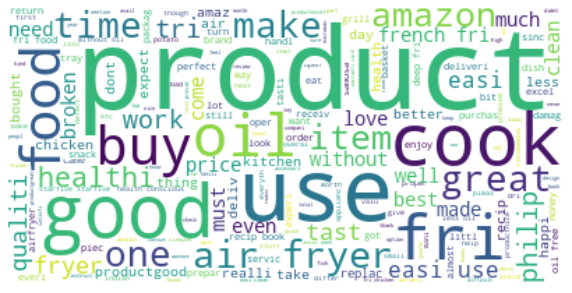

In [ ]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.CleanedText.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

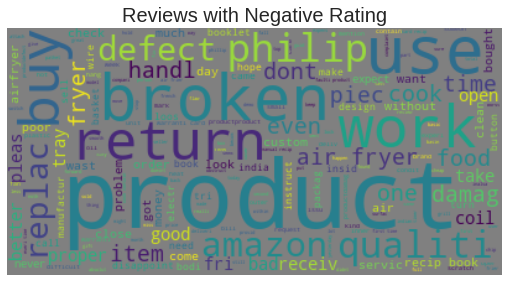

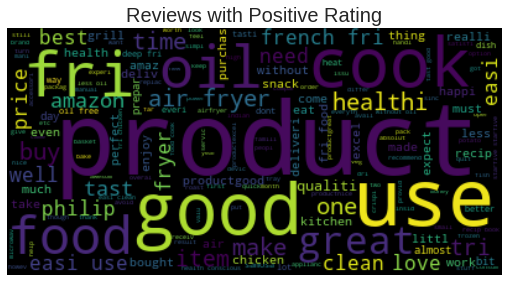

In [ ]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([3,4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.CleanedText.str.cat()
positive_reviews_str = positive_reviews.CleanedText.str.cat()
wordcloud_negative = WordCloud(background_color='gray').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Rating',fontsize=20)

fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Rating',fontsize=20)
plt.show()

In [ ]:
product_data.reset_index(inplace=True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(product_data)):
    review = re.sub('[^a-zA-Z]', ' ', product_data['CleanedText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:

## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:

X.shape

(3476, 5000)

In [ ]:
y=product_data['pol_num']

In [ ]:

## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
classifier.fit(X_train, y_train)
pred_NB = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score of NB: ', accuracy_score(y_test, pred_NB)*100)
cm = metrics.confusion_matrix(y_test, pred_NB)
cm

Accuracy score of NB:  82.8397212543554


array([[ 48,  15,  52],
       [ 11, 144,  77],
       [ 20,  22, 759]])

In [ ]:
print("Classification Report\n",classification_report(y_test, pred_NB))

Classification Report
               precision    recall  f1-score   support

          -1       0.61      0.42      0.49       115
           0       0.80      0.62      0.70       232
           1       0.85      0.95      0.90       801

    accuracy                           0.83      1148
   macro avg       0.75      0.66      0.70      1148
weighted avg       0.82      0.83      0.82      1148



**SVM**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') #  Linear 

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_predsvm= clf.predict(X_test)
print(y_predsvm)

['1' '1' '1' ... '-1' '0' '1']


In [ ]:
print('Accuracy score of NB: ', accuracy_score(y_test, y_predsvm)*100)
con_M = metrics.confusion_matrix(y_test, y_predsvm)
cm

Accuracy score of NB:  88.41463414634147


array([[ 48,  15,  52],
       [ 11, 144,  77],
       [ 20,  22, 759]])

In [ ]:
print("Classification Report\n",classification_report(y_test, y_predsvm))

Classification Report
               precision    recall  f1-score   support

          -1       0.76      0.59      0.66       115
           0       0.77      0.92      0.84       232
           1       0.94      0.92      0.93       801

    accuracy                           0.88      1148
   macro avg       0.82      0.81      0.81      1148
weighted avg       0.89      0.88      0.88      1148



In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create dataset
X_train, y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.871 (0.028)


In [ ]:

## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,max_df = 0.7,norm='l2', encoding='latin-1', ngram_range=(1, 2),
stop_words='english')
X_tfidf = tfidf.fit_transform(product_data['CleanedText'])
print("After vectorized text data\n\n",X_tfidf)

After vectorized text data

   (0, 959)	0.3992582680539377
  (0, 96)	0.6328973847482471
  (0, 711)	0.6633503868766487
  (1, 15)	0.33792561564510165
  (1, 607)	0.6267964287933344
  (1, 443)	0.5399661008540784
  (1, 354)	0.31517986328260245
  (1, 12)	0.31942257098145815
  (2, 966)	0.45635831391888776
  (2, 234)	0.4992335192716345
  (2, 706)	0.38391360284568415
  (2, 233)	0.4265219065651894
  (2, 201)	0.365886164298398
  (2, 959)	0.28163754383571826
  (3, 208)	0.5558912263628185
  (3, 789)	0.5492193241858085
  (3, 633)	0.44209255133019554
  (3, 207)	0.44033765958873405
  (4, 278)	0.3557583248843143
  (4, 896)	0.23673739039110592
  (4, 779)	0.47236759361047825
  (4, 105)	0.5378638354962453
  (4, 507)	0.4279010394892852
  (4, 660)	0.1634608954545647
  (4, 277)	0.3084542256144514
  :	:
  (3471, 246)	0.3339717290384532
  (3471, 926)	0.3946858324801313
  (3471, 134)	0.4051115319251633
  (3471, 558)	0.37857466318078137
  (3472, 385)	0.6530510982784345
  (3472, 912)	0.5857886413403373
  (3472, 3

In [ ]:
x_train, x_test, Y_train,Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

In [ ]:
clf_t = LinearSVC()

#Fit train and test into the model
clf_t.fit(x_train, Y_train)

#Predict the result
y_pred = clf_t.predict(x_test)

In [ ]:
print("Confusion Matrix\n",confusion_matrix(Y_test,y_pred))

Confusion Matrix
 [[ 21   6  10]
 [  0  62  10]
 [  5  12 222]]


In [ ]:
print("Accuracy of SVC: ",accuracy_score(Y_test,y_pred)*100)
print("Classification Report\n",classification_report(Y_test,y_pred))

Accuracy of SVC:  87.64367816091954
Classification Report
               precision    recall  f1-score   support

          -1       0.81      0.57      0.67        37
           0       0.78      0.86      0.82        72
           1       0.92      0.93      0.92       239

    accuracy                           0.88       348
   macro avg       0.83      0.79      0.80       348
weighted avg       0.88      0.88      0.87       348



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, Y_train)
y_pred_rf = rf_classifier.predict(x_test)

In [ ]:
cm_RandFor = confusion_matrix(Y_test, y_pred_rf)
cm_RandFor

array([[ 20,   8,   9],
       [  0,  64,   8],
       [  8,  19, 212]])

In [ ]:
print("Accuracy of RF: ",accuracy_score(Y_test,y_pred_rf)*100)
print("Classification Report\n",classification_report(Y_test,y_pred_rf))

Accuracy of RF:  85.0574712643678
Classification Report
               precision    recall  f1-score   support

          -1       0.71      0.54      0.62        37
           0       0.70      0.89      0.79        72
           1       0.93      0.89      0.91       239

    accuracy                           0.85       348
   macro avg       0.78      0.77      0.77       348
weighted avg       0.86      0.85      0.85       348



### **NBC on TF-IDF**



In [ ]:
classifier.fit(x_train, Y_train)
pred_NB_T = classifier.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score of NB: ', accuracy_score(Y_test, pred_NB_T)*100)
cm_T = metrics.confusion_matrix(Y_test, pred_NB_T)
cm_T

Accuracy score of NB:  83.62068965517241


array([[ 14,   6,  17],
       [  0,  47,  25],
       [  3,   6, 230]])

In [ ]:

print("Classification Report\n",classification_report(Y_test, pred_NB_T))

Classification Report
               precision    recall  f1-score   support

          -1       0.82      0.38      0.52        37
           0       0.80      0.65      0.72        72
           1       0.85      0.96      0.90       239

    accuracy                           0.84       348
   macro avg       0.82      0.66      0.71       348
weighted avg       0.83      0.84      0.82       348



In [ ]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(4,4),stop_words='english').fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key= lambda x: x[1],reverse= True)
    return words_freq[:n]

In [ ]:
Philips=only_pos[only_pos.Brand=="Philips"]
print('Positive Reviews on Philips:',Philips)



Positive Reviews on Philips:                                             CleanedText  ...                                          lemma_Pos
2066        come good safe pack product also met expect  ...  [come, good, safe, pack, product, also, met, e...
2068                       think best product cook food  ...                 [think, best, product, cook, food]
2069  good product philipsmust everi kitchen healthi...  ...  [good, product, philipsmust, everi, kitchen, h...
2070                                       amaz product  ...                                    [amaz, product]
2071                                      great product  ...                                   [great, product]
...                                                 ...  ...                                                ...
1522                                       good product  ...                                    [good, product]
1523  airfryer liter save heart attack fast econom u...  ...  [airfryer, li

In [ ]:
words_tri=get_top_n_words(Philips['CleanedText'],50)
words_tri


[('easi use easi clean', 9),
 ('good product easi use', 5),
 ('tast good deep fri', 3),
 ('buy health conscious peopl', 3),
 ('good product use regular', 2),
 ('amaz product food lover', 2),
 ('product peopl want consum', 2),
 ('peopl want consum oil', 2),
 ('enjoy cook philip air', 2),
 ('cook philip air fryer', 2),
 ('valu money good health', 2),
 ('tri french fri chicken', 2),
 ('food health conscious product', 2),
 ('easi make french fri', 2),
 ('differ compar deep fri', 2),
 ('chicken fri fish fri', 2),
 ('recommend buy air fryer', 2),
 ('buy air fryer air', 2),
 ('total oil free cook', 2),
 ('product easi use clean', 2),
 ('save lot oil fat', 2),
 ('use everi altern day', 2),
 ('kebab bread roll french', 2),
 ('bread roll french fri', 2),
 ('eat oil free food', 2),
 ('oil free cook good', 2),
 ('good product health conscious', 2),
 ('product health conscious peopl', 2),
 ('amazon prompt deliveri good', 2),
 ('prompt deliveri good pack', 2),
 ('easi use great product', 2),
 ('grea

In [ ]:
df_pos=pd.DataFrame(words_tri,columns = ['Trigram','Frequency'])
df_pos

Trigram  Frequency
0              easi use easi clean          9
1            good product easi use          5
2               tast good deep fri          3
3       buy health conscious peopl          3
4         good product use regular          2
5          amaz product food lover          2
6        product peopl want consum          2
7            peopl want consum oil          2
8            enjoy cook philip air          2
9            cook philip air fryer          2
10          valu money good health          2
11          tri french fri chicken          2
12   food health conscious product          2
13            easi make french fri          2
14          differ compar deep fri          2
15            chicken fri fish fri          2
16         recommend buy air fryer          2
17               buy air fryer air          2
18             total oil free cook          2
19          product easi use clean          2
20                save lot oil fat          2
21            use everi altern day          2
22         kebab bread roll french          2
23           bread roll french fri          2
24               eat oil free food          2
25              oil free cook good          2
26   good product health conscious          2
27  product health conscious peopl          2
28     amazon prompt deliveri good          2
29       prompt deliveri good pack          2
30          easi use great product          2
31      great product cook healthi          2
32              tast food cook air          2
33             food cook air fryer          2
34          fri chicken french fri          2
35    perfect product healthi life          2
36            food oil good health          2
37   excel product prompt deliveri          2
38          nice product worth buy          2
39         product deliv time good          2
40       good product thank amazon          2
41        heat coil fan temperatur          2
42         coil fan temperatur nob          2
43        fan temperatur nob timer          2
44       temperatur nob timer tray          2
45             nob timer tray pull          2
46           timer tray pull remov          2
47          tray pull remov mechan          2
48         pull remov mechan metal          2
49         remov mechan metal mesh          2

In [ ]:
configure_plotly_browser_state()
df_pos=df_pos.set_index('Trigram')
df_pos.iplot(kind='bar')

**According to the Data we have Majority of customers prefer Philips Brand **

**Reasons**
1.  Working is good
2.  Less oil Consumption,tasty 
3.  Product easy use and easy clean
4.  Best use for deep fry stuff
5.  Worth for money and early delivery
 **From overall Data Philips Stands first because of giving importance to health  **



In [ ]:
Philips_neg=only_Neg[only_Neg.Brand=="Philips"]
print('Negative Reviews on Philips:',Philips_neg)
words_tri_neg=get_top_n_words(Philips_neg['CleanedText'],30)
words_tri_neg

Negative Reviews on Philips:                                             CleanedText  ...                                          lemma_neg
517   total wast moneytak lot time cooktoo much unne...  ...  [total, wast, moneytak, lot, time, cooktoo, mu...
592                                         expect upto  ...                                     [expect, upto]
586              wire short difficult plug amaz purchas  ...      [wire, short, difficult, plug, amaz, purchas]
581       work like microwav bake must say use less oil  ...  [work, like, microwav, bake, must, say, use, l...
568                                 contain littl small  ...                            [contain, littl, small]
...                                                 ...  ...                                                ...
277                          defect product coil broken  ...                    [defect, product, coil, broken]
274                   handl broken join deliveri return  ...            [ha

[('recip book miss box', 2),
 ('work day dont buy', 2),
 ('total wast moneytak lot', 1),
 ('wast moneytak lot time', 1),
 ('moneytak lot time cooktoo', 1),
 ('lot time cooktoo unnecessari', 1),
 ('time cooktoo unnecessari electr', 1),
 ('cooktoo unnecessari electr consumpt', 1),
 ('wire short difficult plug', 1),
 ('short difficult plug amaz', 1),
 ('difficult plug amaz purchas', 1),
 ('work like microwav bake', 1),
 ('like microwav bake say', 1),
 ('microwav bake say use', 1),
 ('bake say use oil', 1),
 ('product intend guess seller', 1),
 ('intend guess seller misplac', 1),
 ('guess seller misplac recip', 1),
 ('seller misplac recip book', 1),
 ('product actual tast proper', 1),
 ('actual tast proper fri', 1),
 ('tast proper fri item', 1),
 ('proper fri item promis', 1),
 ('fri item promis meet', 1),
 ('item promis meet tast', 1),
 ('promis meet tast expect', 1),
 ('meet tast expect moreov', 1),
 ('tast expect moreov stop', 1),
 ('expect moreov stop button', 1),
 ('moreov stop button

In [ ]:
df_Neg=pd.DataFrame(words_tri_neg,columns = ['Trigram','Frequency'])
df_Neg

Trigram  Frequency
0                   recip book miss box          2
1                     work day dont buy          2
2               total wast moneytak lot          1
3                wast moneytak lot time          1
4             moneytak lot time cooktoo          1
5          lot time cooktoo unnecessari          1
6       time cooktoo unnecessari electr          1
7   cooktoo unnecessari electr consumpt          1
8             wire short difficult plug          1
9             short difficult plug amaz          1
10          difficult plug amaz purchas          1
11              work like microwav bake          1
12               like microwav bake say          1
13                microwav bake say use          1
14                     bake say use oil          1
15          product intend guess seller          1
16          intend guess seller misplac          1
17           guess seller misplac recip          1
18            seller misplac recip book          1
19           product actual tast proper          1
20               actual tast proper fri          1
21                 tast proper fri item          1
22               proper fri item promis          1
23                 fri item promis meet          1
24                item promis meet tast          1
25              promis meet tast expect          1
26              meet tast expect moreov          1
27              tast expect moreov stop          1
28            expect moreov stop button          1
29               moreov stop button bad          1

In [ ]:
configure_plotly_browser_state()
df_Neg=df_Neg.set_index('Trigram')
df_Neg.iplot(kind='bar')

 ** Negative Reviews**
 **According to the Data Very few customers are not satisfied with product**

**Reasons**



1.  Damaged product and deliverd defected peice
2.  Recipie book miss
3.  Time consuming
3.  length of the wire is too short
4.   work similar to Microwave




In [ ]:
Amazon_Airfryer_pos=only_pos[only_pos.Brand=="Amazon Airfryer"]
print('positive on Amazon Airfryer:',Amazon_Airfryer_pos)
am_words_tri_pos=get_top_n_words(Amazon_Airfryer_pos['CleanedText'],30)
am_words_tri_pos

positive on Amazon Airfryer:                         CleanedText  ...                           lemma_Pos
2657                  better expect  ...                    [better, expect]
2659  perfect product perfect price  ...  [perfect, product, perfect, price]
2660              econom tasti food  ...               [econom, tasti, food]
2661       excel product dont think  ...       [excel, product, dont, think]
2664                  happi purchas  ...                    [happi, purchas]
...                             ...  ...                                 ...
1468          easi use worthi money  ...          [easi, use, worthi, money]
1472                   good product  ...                     [good, product]
1478                   nice product  ...                     [nice, product]
1482                           good  ...                              [good]
1483        smart use oil free cook  ...       [smart, use, oil, free, cook]

[331 rows x 5 columns]


[('excel product valu money', 2),
 ('good product bad servic', 2),
 ('perfect product perfect price', 1),
 ('excel product dont think', 1),
 ('fantast product competit price', 1),
 ('product competit price gadar', 1),
 ('easi use great tast', 1),
 ('use great tast minim', 1),
 ('great tast minim oil', 1),
 ('great product oil requir', 1),
 ('conveni healthi option peopl', 1),
 ('healthi option peopl enjoy', 1),
 ('option peopl enjoy food', 1),
 ('peopl enjoy food option', 1),
 ('size good easi clean', 1),
 ('superl product great price', 1),
 ('good easi use product', 1),
 ('excel air fryer increas', 1),
 ('air fryer increas life', 1),
 ('fryer increas life span', 1),
 ('air fryer healthier today', 1),
 ('excel product proud owner', 1),
 ('product proud owner inalsa', 1),
 ('proud owner inalsa air', 1),
 ('owner inalsa air fryer', 1),
 ('awesom air fryer easi', 1),
 ('air fryer easi use', 1),
 ('fryer easi use job', 1),
 ('great product amaz price', 1),
 ('boon health conscious peopl', 

In [ ]:
df_am_pos=pd.DataFrame(am_words_tri_pos,columns =['Trigram','Frequency'])
df_am_pos

Trigram  Frequency
0         excel product valu money          2
1          good product bad servic          2
2    perfect product perfect price          1
3         excel product dont think          1
4   fantast product competit price          1
5     product competit price gadar          1
6              easi use great tast          1
7             use great tast minim          1
8             great tast minim oil          1
9         great product oil requir          1
10    conveni healthi option peopl          1
11      healthi option peopl enjoy          1
12         option peopl enjoy food          1
13         peopl enjoy food option          1
14            size good easi clean          1
15      superl product great price          1
16           good easi use product          1
17         excel air fryer increas          1
18          air fryer increas life          1
19         fryer increas life span          1
20       air fryer healthier today          1
21       excel product proud owner          1
22      product proud owner inalsa          1
23          proud owner inalsa air          1
24          owner inalsa air fryer          1
25           awesom air fryer easi          1
26              air fryer easi use          1
27              fryer easi use job          1
28        great product amaz price          1
29     boon health conscious peopl          1

In [ ]:
configure_plotly_browser_state()
df_am_pos=df_am_pos.set_index('Trigram')
df_am_pos.iplot(kind='bar')

KeyError: ignored



**According to the Data we have customers prefer  Brand **

Reasons

1. Healthy option to buy 
2. Less oil Consumption,tasty
3. Product easy use and easy clean
4. Fantastic product at most competitive in  price
4.   **From overall Data Amazon AirFrier Stands best in its cost**



In [ ]:
Amazon_Airfryer_neg=only_Neg[only_Neg.Brand=="Amazon Airfryer"]
print('Negative on Amazon Airfryer:',Amazon_Airfryer_neg)
am_words_tri_Neg=get_top_n_words(Amazon_Airfryer_neg['CleanedText'],30)
am_words_tri_Neg
df_am_Neg=pd.DataFrame(am_words_tri_Neg,columns = ['Trigram','Frequency'])
df_am_Neg

Negative on Amazon Airfryer:                                 CleanedText  ...                                    lemma_neg
539      product box inner thermacol broken  ...     [product, box, inner, thermacol, broken]
519                      poor paint qualiti  ...                       [poor, paint, qualiti]
607             decent product littl faulti  ...             [decent, product, littl, faulti]
609                      poor built qualiti  ...                       [poor, built, qualiti]
679                     take long time cook  ...                     [take, long, time, cook]
671                      miss warranti card  ...                       [miss, warranti, card]
655                    poor qualiti product  ...                     [poor, qualiti, product]
651                                 satisfi  ...                                    [satisfi]
636                                  averag  ...                                     [averag]
518                            

Trigram  Frequency
0        product box inner thermacol          1
1         box inner thermacol broken          1
2        decent product littl faulti          1
3      warranti card instruct manual          1
4          card instruct manual miss          1
5       poor kitchen inalsa airfrier          1
6          damag product reciev weak          1
7          product reciev weak handl          1
8          miss manual warranti card          1
9          poor product qualiti poor          1
10       product qualiti poor servic          1
11            worst product dont buy          1
12          buy inalsa airfryer wast          1
13        inalsa airfryer wast money          1
14            abl return broken piec          1
15           pathet air fryer inalsa          1
16         low qualiti pathet custom          1
17     qualiti pathet custom support          1
18  disappoint product bought amazon          1
19                stop work use miss          1
20                work use miss item          1
21                use miss item list          1
22                miss item list box          1
23         worst servic poor qualiti          1
24       servic poor qualiti product          1
25        poor product servic amazon          1

In [ ]:
configure_plotly_browser_state()
df_am_Neg=df_am_Neg.set_index('Trigram')
df_am_Neg.iplot(kind='bar')

In [ ]:
#NEGATIVE REVIEWS ON AMAZON AIR FRYER**
#1.Poor paint quality
#2.Improper packing
#3.Missing of manual and warranty




SyntaxError: ignored

In [ ]:
insala_Airfryer_neg=only_Neg[only_Neg.Brand=="Insala airfryer"]
print('Negative on Amazon Airfryer:',insala_Airfryer_neg)
In_words_tri_Neg=get_top_n_words(insala_Airfryer_neg['CleanedText'],30)
In_words_tri_Neg
df_In_Neg=pd.DataFrame(In_words_tri_Neg,columns = ['Trigram','Frequency'])
df_In_Neg

Negative on Amazon Airfryer:                                 CleanedText  ...                                    lemma_neg
6                              worst experi  ...                              [worst, experi]
603                                 satisfi  ...                                    [satisfi]
587                     take long time cook  ...                     [take, long, time, cook]
584                    poor qualiti product  ...                     [poor, qualiti, product]
554      product box inner thermacol broken  ...     [product, box, inner, thermacol, broken]
658                      poor built qualiti  ...                       [poor, built, qualiti]
610                      miss warranti card  ...                       [miss, warranti, card]
647                                  averag  ...                                     [averag]
435                           worst product  ...                             [worst, product]
468                            

Trigram  Frequency
0        product box inner thermacol          1
1         box inner thermacol broken          1
2      warranti card instruct manual          1
3          card instruct manual miss          1
4          miss manual warranti card          1
5          damag product reciev weak          1
6          product reciev weak handl          1
7       poor kitchen inalsa airfrier          1
8        decent product littl faulti          1
9          worst servic poor qualiti          1
10       servic poor qualiti product          1
11         low qualiti pathet custom          1
12     qualiti pathet custom support          1
13            abl return broken piec          1
14           pathet air fryer inalsa          1
15         poor product qualiti poor          1
16       product qualiti poor servic          1
17        poor product servic amazon          1
18  disappoint product bought amazon          1
19                stop work use miss          1
20                work use miss item          1
21                use miss item list          1
22                miss item list box          1
23            worst product dont buy          1
24          buy inalsa airfryer wast          1
25        inalsa airfryer wast money          1

In [ ]:
#Negative reviews on insala air fryer
#1.Low Quality/ Pathetic Customer Support
#2. Product has manufacturing defect.
#3.Poor design and Quality. Look for something Better.
#4. Loose body. Top cover not closing tightly
#5.Air frier became nonfunctional within gaurentee period
#6.No warranty card no recipe book received
#These are the issues faced by the customers on this product.

In [ ]:
kn_Airfryer_neg=only_Neg[only_Neg.Brand=="Kenster"]
print('Negative on kenstar Airfryer:',kn_Airfryer_neg)
kn_words_tri_Neg=get_top_n_words(kn_Airfryer_neg['CleanedText'],30)
kn_words_tri_Neg
df_kn_Neg=pd.DataFrame(kn_words_tri_Neg,columns = ['Trigram','Frequency'])
df_kn_Neg

Negative on kenstar Airfryer:                              CleanedText  ...                                  lemma_neg
458                           disappoint  ...                               [disappoint]
451                 matter week wast buy  ...                  [matter, week, wast, buy]
449                recip book given miss  ...                 [recip, book, given, miss]
442                              satisfi  ...                                  [satisfi]
486    snall wire wrong descript mention  ...    [snall, wire, wrong, descript, mention]
3350        remov extra fat chicken meat  ...         [remov, extra, fat, chicken, meat]
3342  kenstar aster digi oxi fryer black  ...  [kenstar, aster, digi, oxi, fryer, black]
1055  product valu money recip book miss  ...  [product, valu, money, recip, book, miss]
75               worst experi wast money  ...               [worst, experi, wast, money]
376               build qualiti question  ...                 [build, qualiti, q

Trigram  Frequency
0          matter week wast buy          1
1         recip book given miss          1
2     snall wire wrong descript          1
3   wire wrong descript mention          1
4       remov extra fat chicken          1
5        extra fat chicken meat          1
6        kenstar aster digi oxi          1
7          aster digi oxi fryer          1
8          digi oxi fryer black          1
9      product valu money recip          1
10        valu money recip book          1
11        money recip book miss          1
12      worst experi wast money          1

In [ ]:
#Negative reviews on kenster
#1.Broken product
#2.Product defective

In [ ]:
kent_Airfryer_neg=only_Neg[only_Neg.Brand=="Kent"]
print('Negative on kent Airfryer:',kent_Airfryer_neg)
kent_words_tri_Neg=get_top_n_words(kent_Airfryer_neg['CleanedText'],5)
kent_words_tri_Neg
df_kent_Neg=pd.DataFrame(kent_words_tri_Neg,columns = ['Trigram','Frequency'])
df_kent_Neg

Negative on kent Airfryer:                            CleanedText  ...                                lemma_neg
455                        bad qualiti  ...                           [bad, qualiti]
52   worst product possibl need refund  ...  [worst, product, possibl, need, refund]
42                              pathet  ...                                 [pathet]
31                      good make food  ...                       [good, make, food]
197                       qualiti poor  ...                          [qualiti, poor]

[5 rows x 5 columns]


Trigram  Frequency
0   worst product possibl need          1
1  product possibl need refund          1

In [ ]:
#Negative reviews on kent
#1. Bad quality.
#2.Malfunctioning within 2 weeks of purchase
#3. Didn't work after 1 time use




In [ ]:
AMC_Airfryer_neg=only_Neg[only_Neg.Brand=="American Micronic"]
print('Negative on kent Airfryer:',AMC_Airfryer_neg)
AMC_words_tri_Neg=get_top_n_words(AMC_Airfryer_neg['CleanedText'],25)
AMC_words_tri_Neg
df_AMC_Neg=pd.DataFrame(AMC_words_tri_Neg,columns = ['Trigram','Frequency'])
df_AMC_Neg

Negative on kent Airfryer:                                        CleanedText  ...                                          lemma_neg
563                                 averag product  ...                                  [averag, product]
463                                         expect  ...                                           [expect]
462                                      tast good  ...                                       [tast, good]
460                          worst warranti servic  ...                          [worst, warranti, servic]
453                                        satisfi  ...                                          [satisfi]
445                                  tranport good  ...                                   [tranport, good]
473                                           sure  ...                                             [sure]
716   product gud ltr true base small compar brand  ...  [product, gud, ltr, true, base, small, compar,...
1357      

Trigram  Frequency
0     product gud ltr true          1
1        gud ltr true base          1
2      ltr true base small          1
3   true base small compar          1
4  base small compar brand          1
5     pleas note air fryer          1
6       note air fryer pan          1
7        air fryer pan fit          1
8     fryer pan fit proper          1

In [ ]:
#Negative reviews on American Micronic
#1.Worst Warranty Service
#2.Not as expected!!
#3.Not upto the Mark
#4.Not a versatile fryer!

In [ ]:

AMC_Airfryer_pos=only_pos[only_pos.Brand=="American Micronic"]
print('positive on AMC Airfryer:',AMC_Airfryer_pos)
AMC_words_tri_pos=get_top_n_words(AMC_Airfryer_pos['CleanedText'],25)
AMC_words_tri_pos
df_AMC_pos=pd.DataFrame(AMC_words_tri_pos,columns = ['Trigram','Frequency'])
df_AMC_pos

positive on AMC Airfryer:                                    CleanedText  ...                                         lemma_Pos
2501                  excel daili healthi cook  ...                     [excel, daili, healthi, cook]
2502  easi use healthi flavour rich food fryer  ...  [easi, use, healthi, flavour, rich, food, fryer]
2503                          one kind product  ...                              [one, kind, product]
2505                             best bachelor  ...                                  [best, bachelor]
2507                    great product low cost  ...                       [great, product, low, cost]
...                                        ...  ...                                               ...
1474      product qualiti top class usag limit  ...       [product, qualiti, top, class, usag, limit]
1487                         use member famili  ...                             [use, member, famili]
1477                              good product  ...     

Trigram  Frequency
0          excel daili healthi cook          1
1          easi use healthi flavour          1
2          use healthi flavour rich          1
3         healthi flavour rich food          1
4           flavour rich food fryer          1
5            great product low cost          1
6              excel air fryer amaz          1
7              air fryer amaz price          1
8         absolut blown away wonder          1
9         blown away wonder product          1
10    away wonder product technolog          1
11  wonder product technolog permit          1
12     product technolog permit fri          1
13       technolog permit fri littl          1
14           excel product use week          1
15         product use week chicken          1
16           best air fryer qualiti          1
17           air fryer qualiti wise          1
18          fryer qualiti wise come          1
19           product good look good          1
20             good look good thing          1
21          look good thing purchas          1
22          shes alreadi tri recipi          1
23           alreadi tri recipi day          1
24             tri recipi day enjoy          1

In [ ]:
#Positive reviews on American Micronic
#1.A healthy way to perfect cooking
# 2.A must-have for an electric kitchen
#3.DAMM GOOD FOR THE PRICE POINT!!!!

